In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import signal

%matplotlib inline

**1.- Teorema Central del Límite**

Escribe un programa en matlab que tome un numero de muestras (por  ejemplo 1000) de una distribución uniforme (digamos que tenemos un vector de muestras). Repetir esto N veces. Demostrar gráficamente que el vector suma de las N vectores tiene un histograma con forma de gaussiana (tanto más cuanto mayor es N).

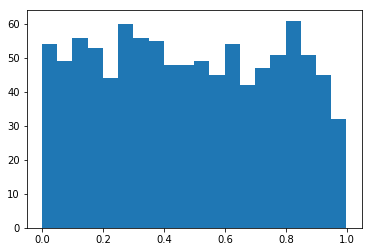

In [8]:
x = np.random.uniform(size=1000)
plt.hist(x, 20);

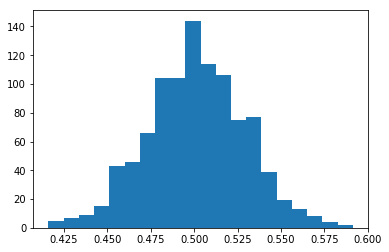

In [9]:
x = np.zeros(1000)
for n in range(100):
    x += np.random.uniform(size=1000)
x = x / 100
plt.hist(x, 20);

**2.- Suma de variables aleatorias**

Generar n_samples números aleatorios de las distribuciones N(1,1) y N(4,2). Realizar la suma de ellas y pintar su histograma. Comprobar que es la normal N(5,3) pintando (rojo) la gaussiana N(5,3). Hacer la convolución (discreta) de las dos gausianas N(1,1) y N(4,2) y comprobar gráficamente que también sale N(5,3).

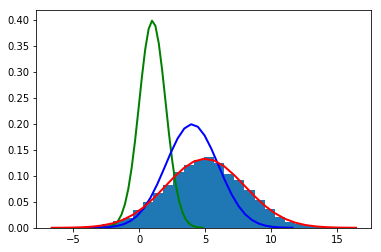

In [10]:
n = 10000
b = np.random.randn(n)

x_mu = 1
x_sigma = 1
x = b*x_sigma + x_mu

y_mu = 4
y_sigma = 2
y = b*y_sigma + y_mu

# Get x and y histograms, but dont plot them.
x_count, x_bins, ignored = plt.hist(x, 30, density=True);
y_count, y_bins, ignored = plt.hist(y, 30, density=True);
plt.clf()

# Plot x
plt.plot(x_bins, 1/(x_sigma * np.sqrt(2 * np.pi)) *
		np.exp( - (x_bins - x_mu)**2 / (2 * x_sigma**2) ), 
		linewidth=2, color='g');
# Plot y
plt.plot(y_bins, 1/(y_sigma * np.sqrt(2 * np.pi)) *
		np.exp( - (y_bins - y_mu)**2 / (2 * y_sigma**2) ), 
		linewidth=2, color='b');
# Plot z
z_mu = 5
z_sigma = 3
z = x + y
z_count, z_bins, ignored = plt.hist(z, 30, density=True);
plt.plot(z_bins, 1/(z_sigma * np.sqrt(2 * np.pi)) *
		np.exp( - (z_bins - z_mu)**2 / (2 * z_sigma**2) ), 
		linewidth=2, color='r');

Usando la librería **scipy**, podemos realizar las convoluciones de las funciones de probabilidad de nuestras dos distribuciones normales:

In [ ]:
x = stats.norm(1, 1)
y = stats.norm(4, 2)
delta = 1e-4
big_grid = np.arange(-10,10,delta)

pdfx = x.pdf(big_grid)
pdfy = y.pdf(big_grid)

conv_pdf = np.convolve(pdfx, pdfy, 'same')

plt.plot(big_grid,pdfx, label='x')
plt.plot(big_grid,pdfy, label='y')
plt.plot(big_grid,conv_pdf*delta, label='z')
#plt.hist(z, 30, density=True)
plt.legend(loc='best'), plt.suptitle('PDFs')
plt.show()

**3.- Producto de gaussianas**

Como en el ejercicio anterior, pero en lugar de la suma hacer la media de las muestras sacadas de N(1,1) y N(4,2). Dibujar la salida y comprobar que el resultado coincide con el de la expresión dada
en clase

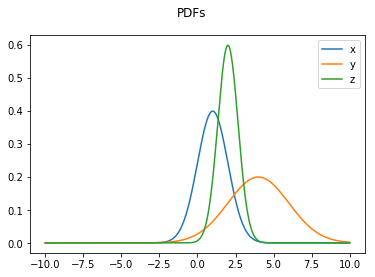

In [12]:
mean1 = 1
sigma1 = 1
mean2 = 4
sigma2 = 2


mean3 = (sigma2*mean1 + sigma1*mean2)/(sigma1 + sigma2)
sigma3 = (sigma1*sigma2)/((sigma1 + sigma2))



x = stats.norm(mean1, sigma1)
y = stats.norm(mean2, sigma2)
z = stats.norm(mean3, sigma3)


delta = 1e-4
big_grid = np.arange(-10,10,delta)

pdfx = x.pdf(big_grid)
pdfy = y.pdf(big_grid)
pdfz = z.pdf(big_grid)
conv_pdf = signal.fftconvolve(pdfx, pdfy, 'same')

plt.plot(big_grid,pdfx, label='x')
plt.plot(big_grid,pdfy, label='y')
plt.plot(big_grid,pdfz, label='z')
plt.legend(loc='best'), plt.suptitle('PDFs')
plt.show()

**3.- Transformación lineal de v.a. normales**

Generar n_samples números aleatorios de las distribuciones N(1,1) transformarlo con la expresión y = x*2+ 2 y pintar el resultado. Comprobar dibujando encima que la distribución sigue una
gaussiana N(4, 4)

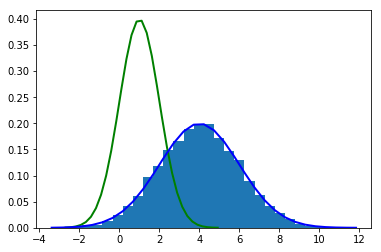

In [154]:
n = 10000
b = np.random.randn(n)

x_mu = 1
x_sigma = 1
x = b*x_sigma + x_mu

y_mu = 4
y_sigma = 2
y = x * 2 + 2

# Get x histogram, but dont plot it.
x_count, x_bins, ignored = plt.hist(x, 30, density=True);
plt.clf()

# Plot x
plt.plot(x_bins, 1/(x_sigma * np.sqrt(2 * np.pi)) *
		np.exp( - (x_bins - x_mu)**2 / (2 * x_sigma**2) ), 
		linewidth=2, color='g');
# Plot y
y_count, y_bins, ignored = plt.hist(y, 30, density=True);
plt.plot(y_bins, 1/(y_sigma * np.sqrt(2 * np.pi)) *
		np.exp( - (y_bins - y_mu)**2 / (2 * y_sigma**2) ), 
		linewidth=2, color='b');


Repetir para la función y = x²+2 y pintar el resultado. ¿Es gaussiana?

(-5, 15)

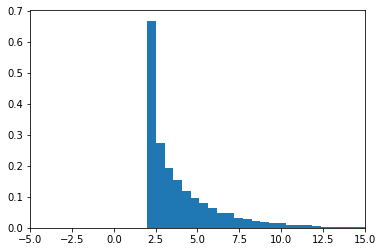

In [164]:
n = 10000
b = np.random.randn(n)

x_mu = 1
x_sigma = 1
x = b*x_sigma + x_mu

y_mu = 4
y_sigma = 2
y = x**2 + 2

# Plot y
y_count, y_bins, ignored = plt.hist(y, 50, density=True);

plt.xlim([-5, 15])

Podemos ver claramente que el histograma de y = x²+2 no sigue una distribución gaussiana.